<a href="https://colab.research.google.com/github/sherifmost/Topology_Mapping/blob/main/Topology_Mapping_Ahmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initilizing

In [23]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from google.colab import drive
import networkx as nx
from random import randint
from sklearn.cluster import KMeans

In [2]:
path = '/content/drive/My Drive/Topology Dataset/Dataset';
delim = '/';
txt_ext = ".txt";
topology_10 = "t_10_";
topology_50 = "t_50_";
topology_100 = "t_100_";
ground_txt = "ground_truth";

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# unzipping the data zip file run once
!unzip '/content/drive/My Drive/Topology Dataset/Dataset.zip' -d '/content/drive/My Drive/Topology Dataset'

Archive:  /content/drive/My Drive/Topology Dataset/Dataset.zip
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/ground_truth.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_0.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_1.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_2.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_3.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_4.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_5.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_6.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_7.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_8.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_10_9.txt  
  inflating: /content/drive/My Drive/Topology Dataset/Dataset/t_100_0.txt  
  inflating: /content/drive/My

#Dataset

functions used to get the graph data and cluster values from the dataset text files

In [4]:
# function takes read lines from text file and return an array with this data
def get_file_data(lines):
  data = []
  for line in lines:
    numbers = []
    for num in line.split():
      numbers.append(int(num))
    data.append(np.array(numbers))
  data = np.array(data)
  return data;

In [5]:
# function used to read the graph data from the text files
def get_data():
  data = []
  for i in range(0,10):
    file = open(path + delim + topology_10 + str(i) + txt_ext,"r")
    lines = file.readlines()
    data.append(get_file_data(lines))
  for i in range(0,10):
    file = open(path + delim + topology_50 + str(i) + txt_ext,"r")
    lines = file.readlines()
    data.append(get_file_data(lines))
  for i in range(0,10):
    file = open(path + delim + topology_100 + str(i) + txt_ext,"r")
    lines = file.readlines()
    data.append(get_file_data(lines))
  return data;

In [6]:
# function used to get the cluster values from the dataset
def get_ground_truth():
  ground_truth = []
  file = open(path + delim + ground_txt + txt_ext,"r")
  lines = file.readlines()
  ground_truth.append(get_file_data(lines))
  return np.array(ground_truth);

In [7]:
data = get_data()
ground_truth = get_ground_truth()

In [ ]:
gt=ground_truth[0][1]
print(gt)#cluster values of t_50_5
dd=data[1]
print("from " + str(dd[0][0]) + " to " + str(dd[0][1]) + " weight " + str(dd[0][2]))#topology t_50_5
for i in dd:
  print(i)

[0 0 0 1 1 1 1 0 0 0]
from 9 to 1 weight 666
[  9   1 666]
[  6   7 235]
[  8   1 243]
[  4   3 777]
[  4  10 140]
[  7   8 366]
[  4   5 146]
[  5   7 149]
[  9   7 913]
[  2   6 639]
[  4   5 378]
[  4   5 327]
[  5   8 581]
[  9   8 940]
[  8   9 720]
[  7   8 242]
[  8   4 828]
[  7   5 966]


#Visualize the Topologies

function to create random colors used to set nodes of same cluster with same color

In [8]:
def get_node_colors(node_values):
  colors = []
  node_colors = []
  n = node_values.size
  for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
  for value in node_values:
    node_colors.append(colors[value])
  return node_colors;

function used to initialize the graph given t_(nodes_num)_(topology_num),
nodes_num is the number of nodes in the graph (10 or 50 or 100)
topology_num is the number of the sample used (0 - 9)

In [9]:
def set_graph(nodes_num, topology_num):
  # calculating n to get the index of the graph data and clustering values
  n = 0
  if (nodes_num == 50):
    n += 10
  elif (nodes_num == 100):
    n += 20
  n += topology_num
  graph_data = data[n]
  # filling graph nodes and edges with weights
  g = nx.Graph()
  for i in range(1,nodes_num + 1):
    g.add_node(i)
  for edge in graph_data:
    g.add_edge(edge[0],edge[1],weight = edge[2])
  return g;

Visualization function takes number of nodes (10,50,100) and topology sample number (0-9) and draws the graph after and before clustering with random values used for now

In [10]:
def visualize_topology(g, cluster_values= np.array([0,1,0,0,1,2,0,2,1,1])):
  ###cluster_values = ground_truth[0][n]
  #cluster_values = np.array([0,1,0,0,1,2,0,2,1,1])
  pos_value = nx.circular_layout(g)
  # visulaization before clustering
  plt.figure(figsize = (15, 10))
  nx.draw_networkx_nodes(g, pos = pos_value)
  nx.draw_networkx_labels(g, pos = pos_value)
  nx.draw_networkx_edges(g, pos = pos_value)
  nx.draw_networkx_edge_labels(g, pos = pos_value,edge_labels = nx.get_edge_attributes(g,'weight'))
  plt.show()
  # visualization after clustering
  plt.figure(figsize = (15, 10))
  nx.draw_networkx_nodes(g, pos = pos_value, node_color = get_node_colors(cluster_values))
  nx.draw_networkx_labels(g, pos = pos_value)
  nx.draw_networkx_edges(g, pos = pos_value)
  nx.draw_networkx_edge_labels(g, pos = pos_value,edge_labels = nx.get_edge_attributes(g,'weight'))
  plt.show()
  return;

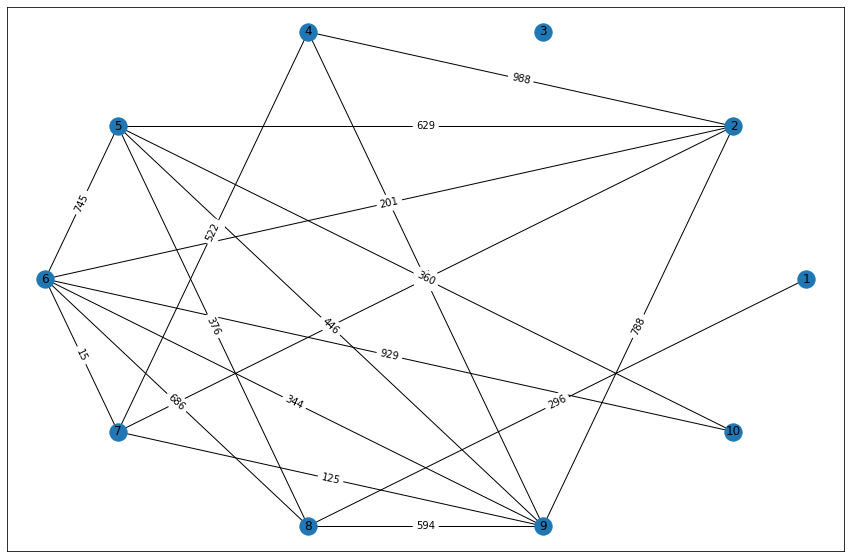

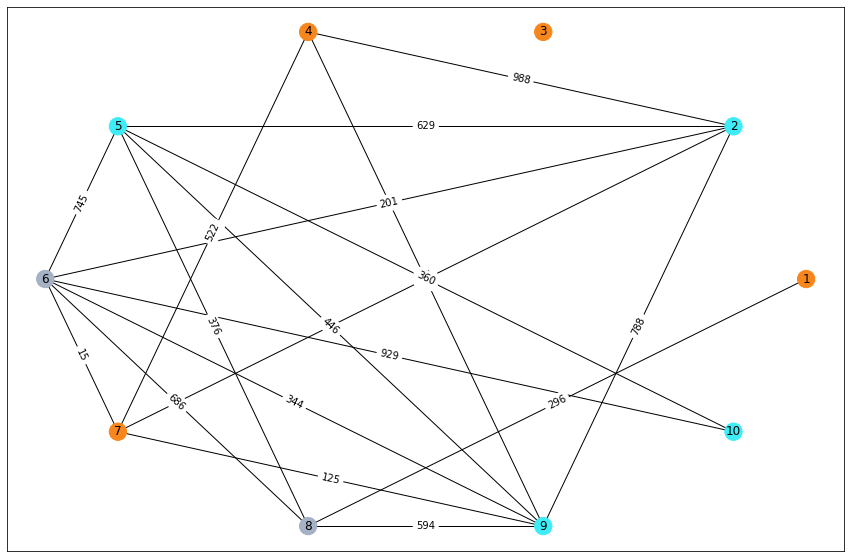

In [11]:
g = set_graph(10,0)
visualize_topology(g)

#Topology Mapping

Function implementing the spectral clustering algorithm, returning k clusters used to represesnt the nodes in the graph

In [34]:
def spectral_clustering(g, k):
  # Adjacency Matrix (Similarity Matrix)
  W = nx.adjacency_matrix(g)
  A = W.todense()
  # Degree Matrix
  D = np.diag(np.sum(np.array(W.todense()), axis=1))
  # Laplacian Matrix - symmetric matrix
  L = D - A
  # eigenvalues and eigenvectors
  e, v = np.linalg.eig(L)
  # As dominant eigen vectors should be taken according to the magnitude of eigen values 
  # (as negative values only indicate reverse of the vector direction), we should consider the
  # absolute value of the eigen values.
  e = np.absolute(e);
  # using argsort to get dominant eigen vectors according to largest eigen values
  sorted_indecies = e.argsort()[::-1];
  v = v[:,sorted_indecies];
  # when checking the results, eigen vectors may include imaginary parts.
  # we are only concerned with the real parts
  v = np.real(v);
  U = np.array(v[:, :k])
  km = KMeans(init='k-means++', n_clusters=k)
  km_clustering = km.fit(U)
  cluster_values = np.array(km.labels_)
  print(cluster_values)
  return cluster_values;

[0 6 0 0 4 2 0 1 3 5]


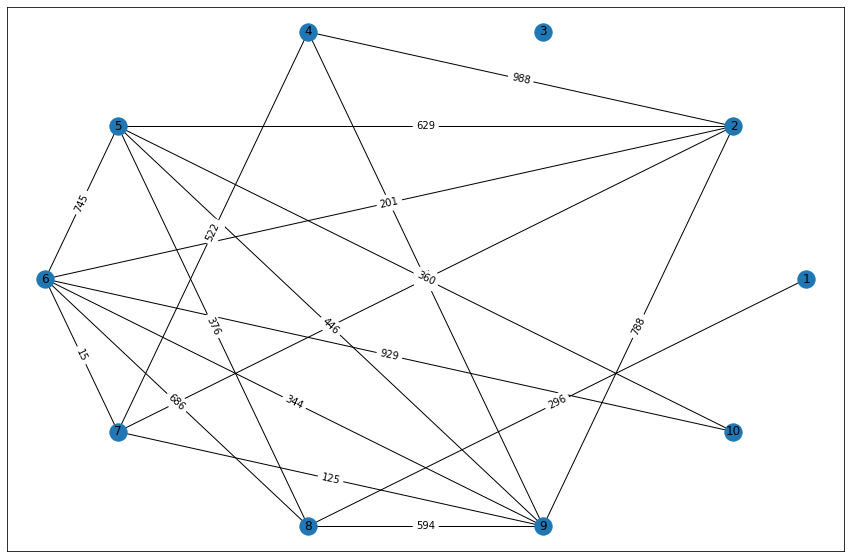

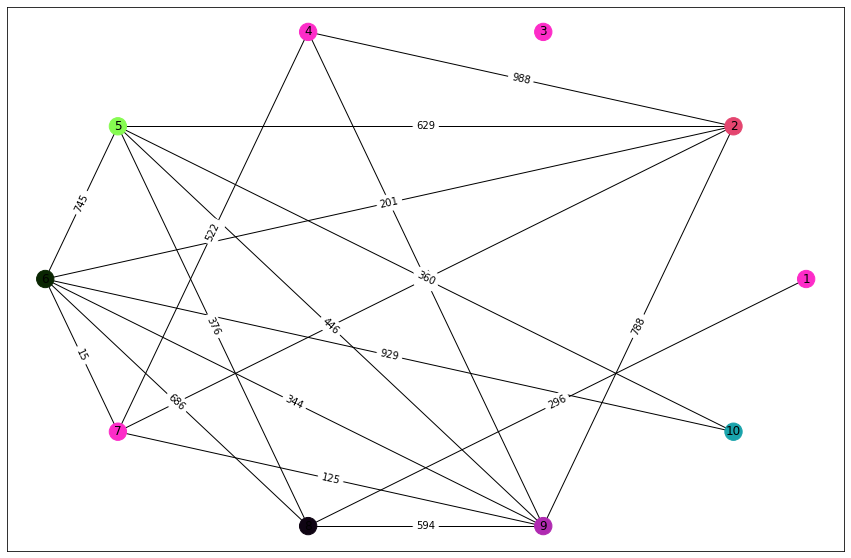

In [32]:
visualize_topology(g, spectral_clustering(g,7))